# The Sparks Foundation
## Domain:  Data Science and Business Analytics
## Batch: November 2021 
## By: Aarushi Gupta

### Task: Exploratory Data Analysis-Terrorism
### Level: Intermediate


### Introduction
##### 1. The Global Terrorism Database
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

##### 2. Characteristics of the Database
1. Contains information on over 180,000 terrorist attacks
2. Currently the most comprehensive unclassified database on terrorist attacks in the world
3. Includes information on more than 88,000 bombings, 19,000 assassinations, and 11,000 kidnappings  since 1970
4. Includes information on at least 45 variables for each case, with more recent incidents including information on more than 120 variables
5. More than 4,000,000 news articles and 25,000 news sources were reviewed to collect incident data from 1998 to 2017 alone

##### 3.Project goals
1. Read the source and do some quick research to understand more about the dataset and its topic
2. Clean the data
3. Perform Exploratory Data Analysis on the dataset
4. Analyze the data more deeply and extract insights
5. Visualize analysis on Google Data Studio . Please find our report here.

### Importing the Relevent Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(20,10)

### Loading the dataset

In [2]:
# Loading the data
terrorism_data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#shape of the dataset
terrorism_data.shape

(181691, 135)

In [4]:
#Descriptive Summary of the dataset
terrorism_data.describe(include="all")

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [5]:
# List of all the columns of the dataset
terrorism_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
#correlation table
terrorism_data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [7]:
#Rename columns in order to get better format
terrorism_data.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'TargetType', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

terrorism_data.columns.values

array(['Eventid', 'Year', 'Month', 'Day', 'approxdate', 'Extended',
       'Resolution', 'country', 'Country', 'region', 'Region',
       'Provstate', 'City', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'Crit1', 'Crit2', 'Crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'Multiple',
       'Success', 'Suicide', 'attacktype1', 'Attacktype', 'attacktype2',
       'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1',
       'TargetType', 'targsubtype1', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1', 'Natlty1', 'targtype2', 'targtype2_txt',
       'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2',
       'Natlty2', 'targtype3', 'targtype3_txt', 'targsubtype3',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'Natlty3',
       'Gname', 'gsubname', 'Gname2', 'gsubname2', 'Gname3', 'gsubname3',
       'motive', 'Guncertain1', 'Guncertain2', 'Guncertain3',
       'individual', 'nperps', 'nperpcap'

In [8]:
#Keep 20 important columns which can be used for further analysis
data = terrorism_data[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'TargetType', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]
data.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,TargetType,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  TargetType   181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

In [10]:
#missing values in the dataset
data.isna().sum()

Eventid            0
Year               0
Country            0
Region             0
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
Attacktype         0
TargetType         0
Natlty1         1559
Gname              0
Guncertain1      380
Claimed        66120
Weaptype           0
Nkill          10313
Nwound         16311
dtype: int64

In [11]:
# filling the missing values using fillna function
data['Nwound']=data['Nwound'].fillna(0)
data['Nkill']=data['Nkill'].fillna(0)
data.isna().sum()

Eventid            0
Year               0
Country            0
Region             0
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
Attacktype         0
TargetType         0
Natlty1         1559
Gname              0
Guncertain1      380
Claimed        66120
Weaptype           0
Nkill              0
Nwound             0
dtype: int64

In [12]:
#data with maximum number of people that were killed
data.loc[data['Nkill'].idxmax()]

Eventid                                       201406150063
Year                                                  2014
Country                                               Iraq
Region                          Middle East & North Africa
Provstate                                          Saladin
City                                                Tikrit
Crit1                                                    1
Crit2                                                    1
Crit3                                                    0
Success                                                  1
Suicide                                                  0
Attacktype                     Hostage Taking (Kidnapping)
TargetType                                        Military
Natlty1                                               Iraq
Gname          Islamic State of Iraq and the Levant (ISIL)
Guncertain1                                            0.0
Claimed                                                1

In [13]:
#saving the total number of damage done which is the sum of number of people killed and number of people wounded
data['Damage']=data['Nkill']+data['Nwound']

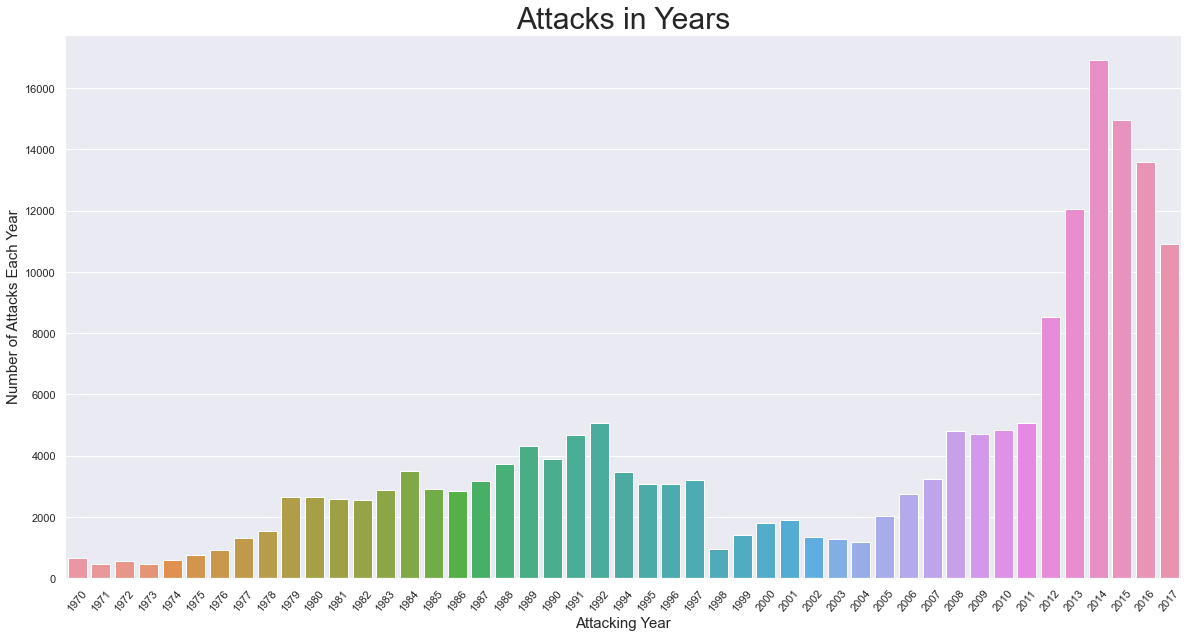

In [14]:
# plotting the year with maximum number of attacks
years_count=data['Year'].value_counts(dropna=False).sort_index()
# Plotting the data
sns.barplot(x=years_count.index,y=years_count.values)
plt.xlabel("Attacking Year",fontsize=15)
plt.ylabel("Number of Attacks Each Year",fontsize=15)
plt.title("Attacks in Years",fontsize=30)
plt.xticks(rotation=50)
plt.show()

<AxesSubplot:xlabel='Year'>

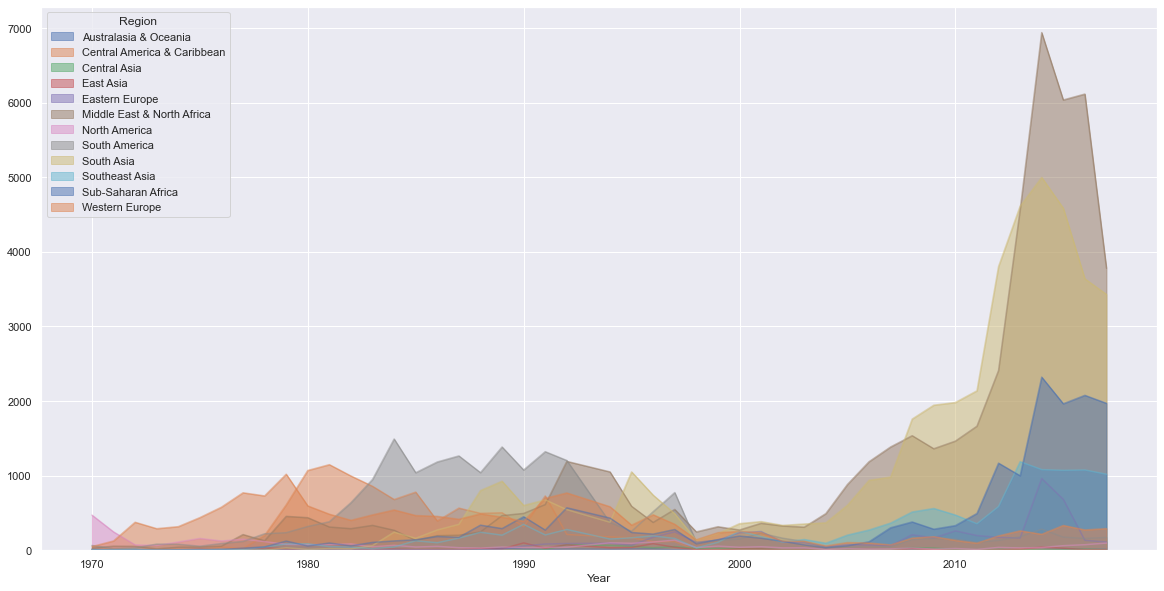

In [15]:
# Area plot for the regions with maximum number of attacks
pd.crosstab(data.Year,data.Region).plot(kind='area',stacked=False,figsize=(20,10))

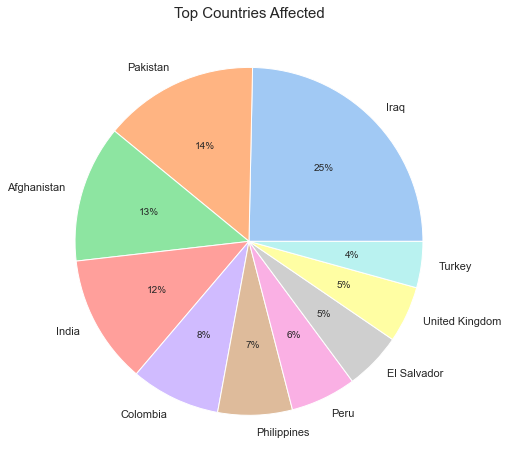

In [18]:
#Using pie chart to plot the top 10 countries that were affected by the terrorist attack
country_count=data['Country'].value_counts(dropna=False).sort_values(axis=0,ascending=False)
plt.figure(figsize=(8,8))
colors=sns.color_palette('pastel')
plt.pie(country_count.values[:10],labels=country_count.index[:10],colors=colors,autopct='%.0f%%')
plt.title("Top Countries Affected",fontsize=15)
plt.show()

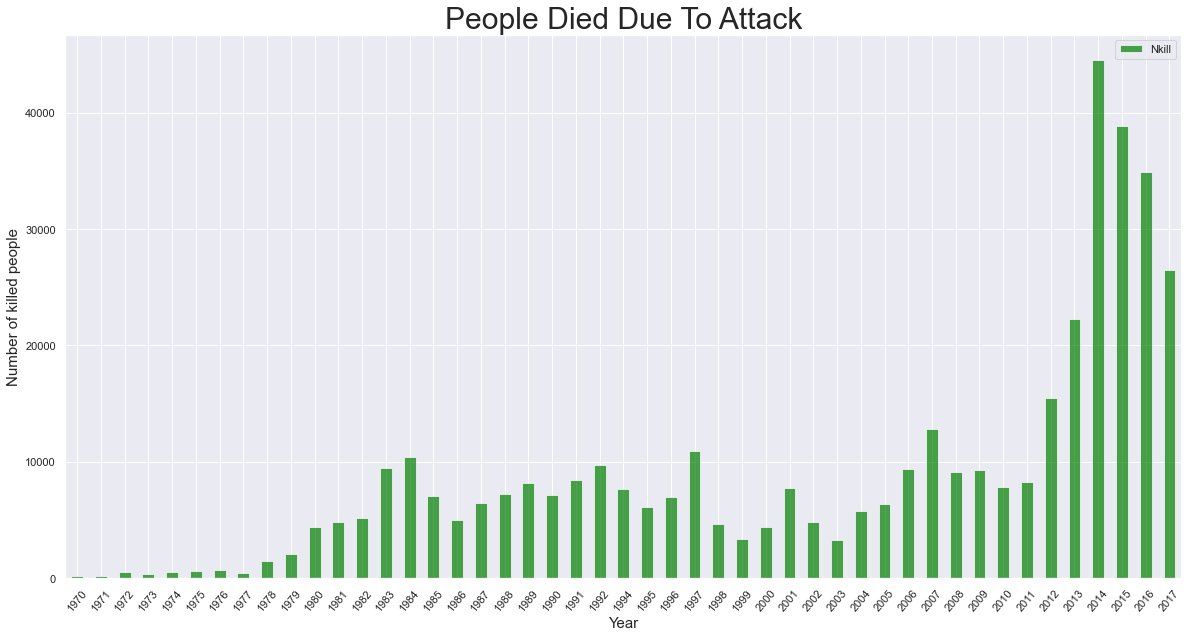

In [19]:
# Using bar chart to plot the year in which maxium number of people were killed
df1=data[["Year","Nkill"]].groupby(['Year']).sum()
df1.plot(kind='bar',alpha=0.7,color='green')
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=30)
plt.ylabel("Number of killed people",fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.show()

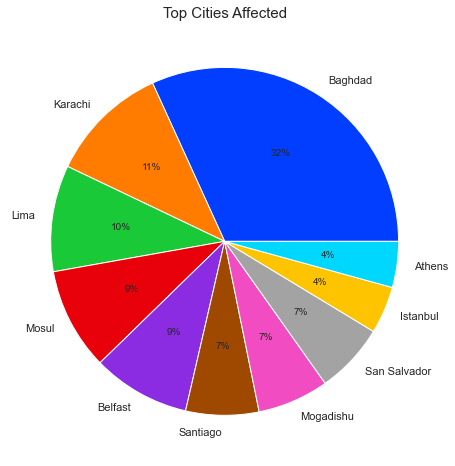

In [20]:
#Using bar chart to plot the top 10 cities that were affected
city_count=data['City'].value_counts(dropna=False).sort_values(axis=0,ascending=False).drop("Unknown")
plt.figure(figsize=(8,8))
colors=sns.color_palette('bright')
plt.pie(city_count.values[:10],labels=city_count.index[:10],colors=colors,autopct='%.0f%%')
plt.title("Top Cities Affected",fontsize=15)
plt.show()

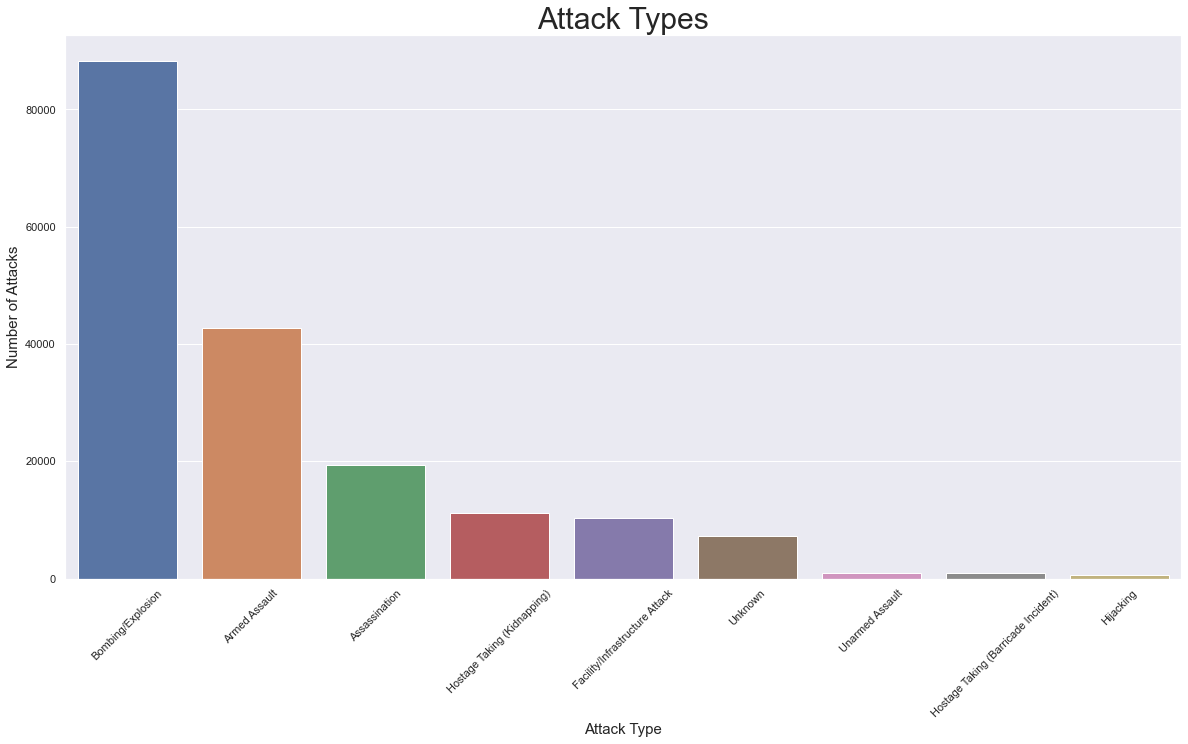

In [21]:
# Using bar chart to plot maximum number of attacks with the attack types that were used 
attacks_count=data['Attacktype'].value_counts(dropna=False)
sns.barplot(x=attacks_count.index,y=attacks_count.values)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.title("Attack Types",fontsize=30)
plt.xticks(rotation=45)
plt.show()

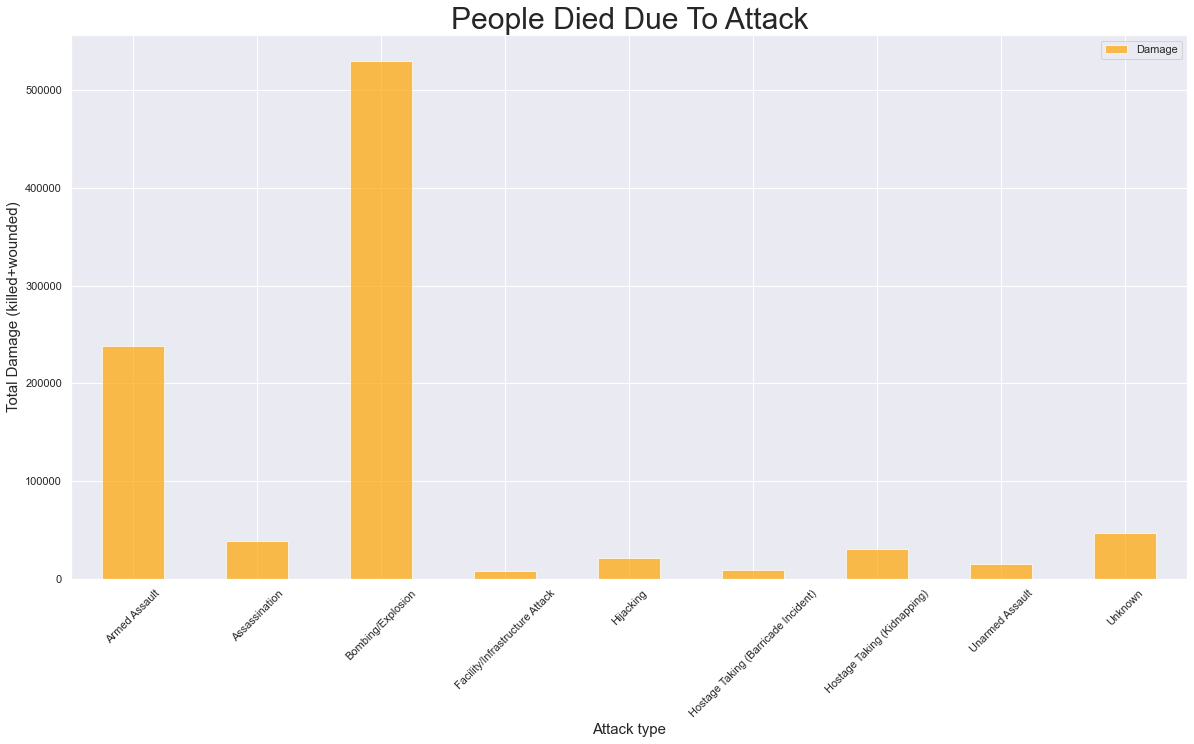

In [22]:
# Plotting total number of people that died due to the attack
df2=data[['Attacktype','Damage']].groupby(['Attacktype']).sum()
df2.plot(kind='bar',alpha=0.7,color='orange')
plt.xticks(rotation = 45)
plt.title("People Died Due To Attack",fontsize=30)
plt.ylabel("Total Damage (killed+wounded)",fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

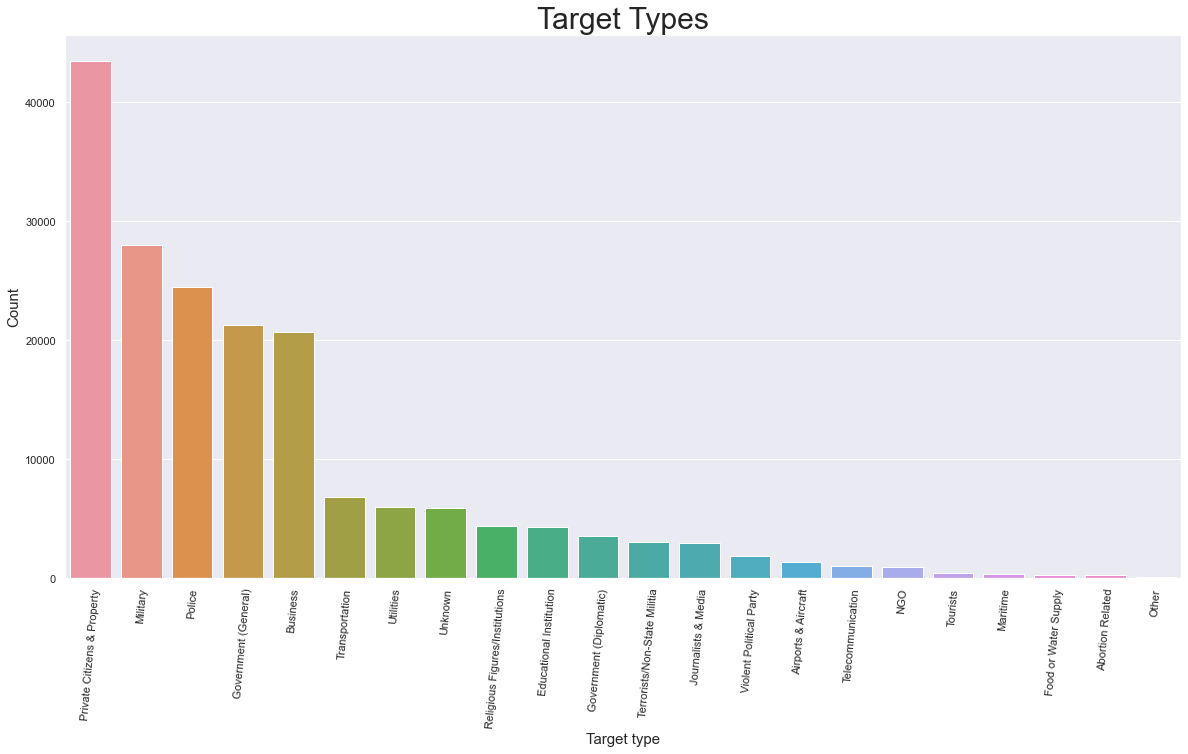

In [23]:
# Using bar chart to explore the target types that were mostly attacked 
target_type_counts=data['TargetType'].value_counts(dropna=False)
sns.barplot(x=target_type_counts.index,y=target_type_counts.values)
plt.xlabel("Target type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Target Types",fontsize=30)
plt.xticks(rotation=85)
plt.show()

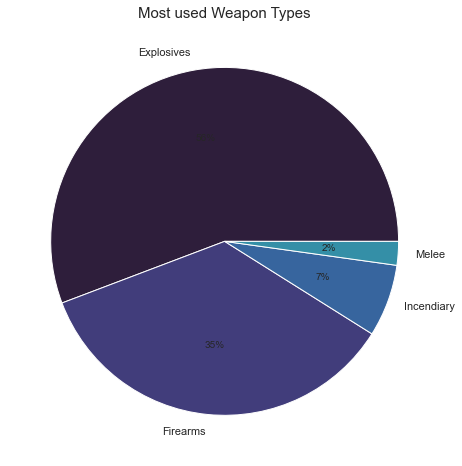

In [24]:
# Using pie chart to see which was the most common weapon type that was used
weapon_type_count=data['Weaptype'].value_counts(dropna=False).drop("Unknown")
plt.figure(figsize=(8,8))
colors=sns.color_palette('mako')
plt.pie(weapon_type_count[:4].values,labels=weapon_type_count.index[:4],colors=colors,autopct='%.0f%%')
plt.title("Most used Weapon Types",fontsize=15)
plt.show()

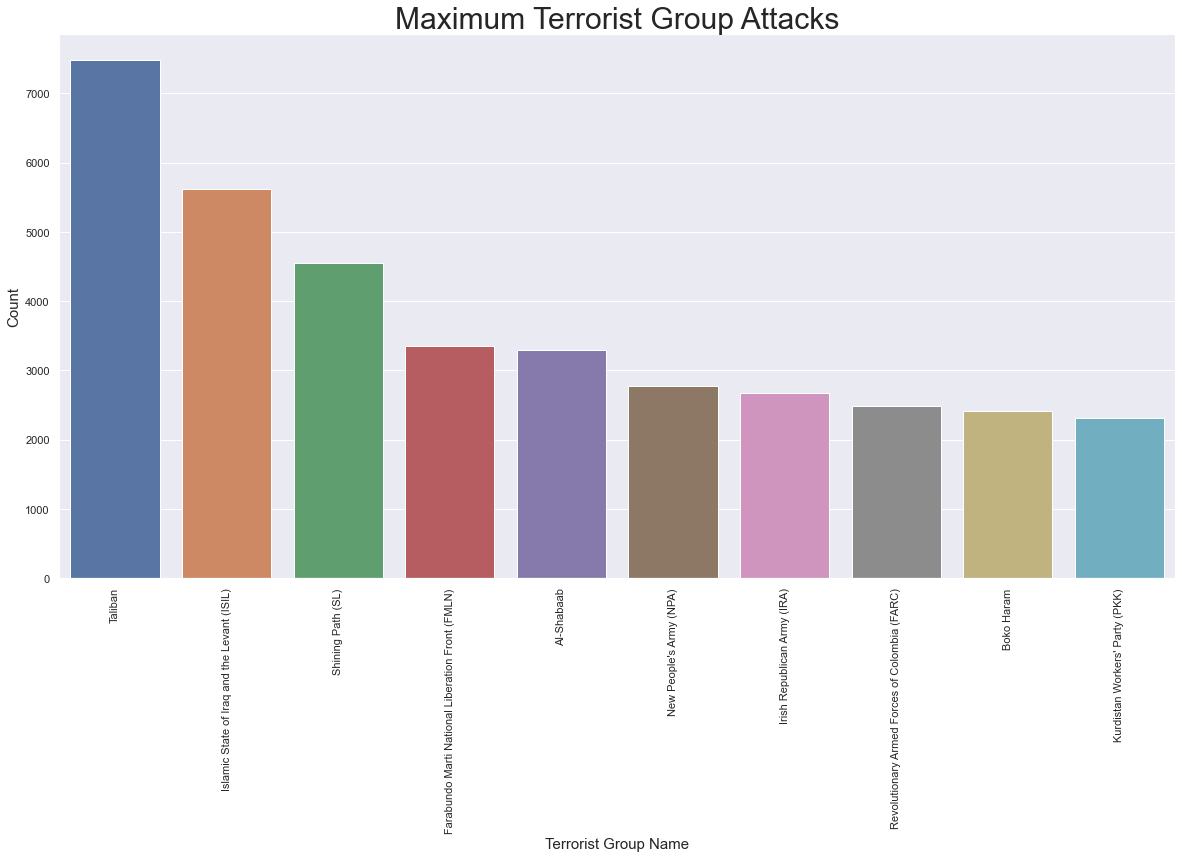

In [25]:
# Plotting the maximum terrorist group attacks
group_count=data['Gname'].value_counts(dropna=False).drop("Unknown")
sns.barplot(x=group_count.index[:10],y=group_count.values[:10])
plt.xlabel("Terrorist Group Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Maximum Terrorist Group Attacks",fontsize=30)
plt.xticks(rotation=90)
plt.show()

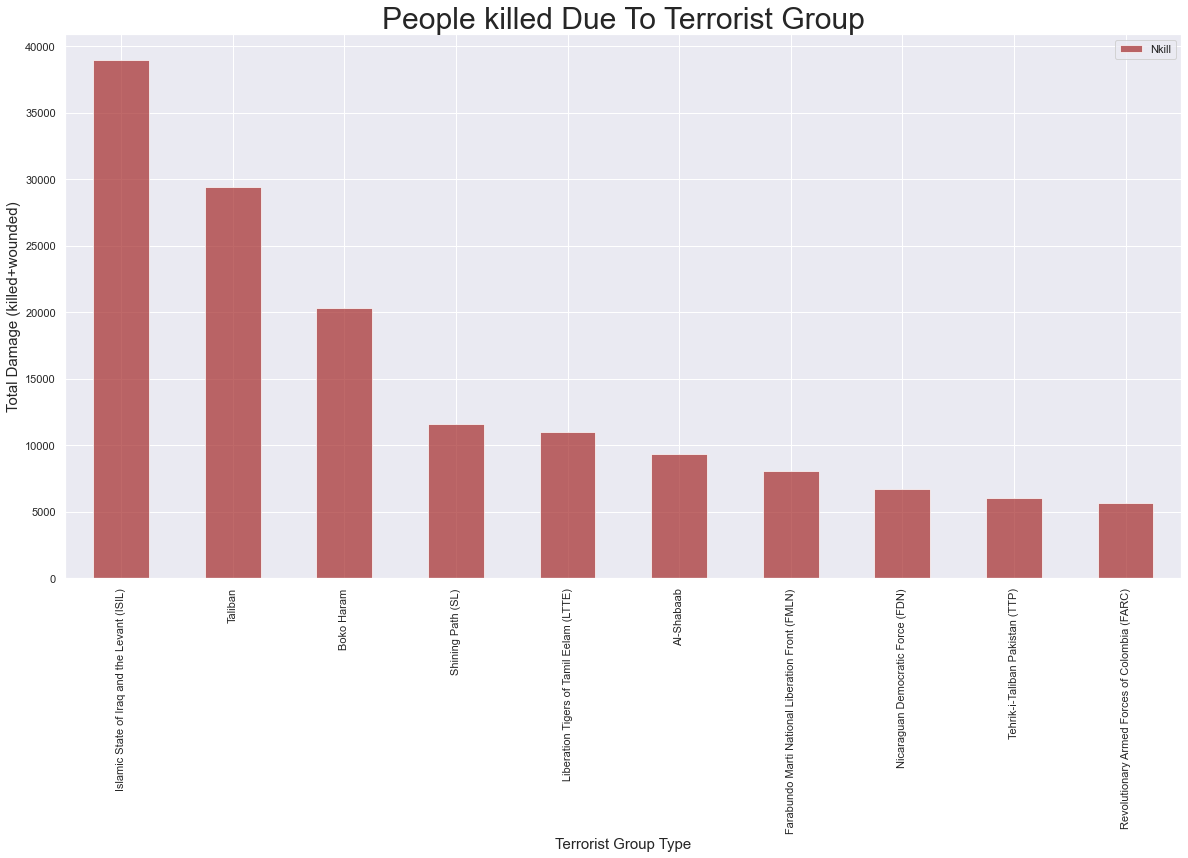

In [26]:
# Graph for total damage done due to terrorist groups (10 terrorist groups)
df3=data[['Gname','Nkill']].groupby(['Gname']).sum().sort_values(by='Nkill',ascending=False).drop("Unknown")
df3[:10].plot(kind='bar',alpha=0.7,color='brown')
plt.xticks(rotation = 90)
plt.title("People killed Due To Terrorist Group",fontsize=30)
plt.ylabel("Total Damage (killed+wounded)",fontsize=15)
plt.xlabel('Terrorist Group Type',fontsize=15)
plt.show()

In [27]:
# Final Table with the results
final_result=data[['Gname','Country','Nkill','Weaptype']]
final_result=final_result.groupby(['Gname','Country','Weaptype'],axis=0).sum().sort_values('Nkill',ascending=False)
final_result=final_result.drop("Unknown").reset_index().head(10)
final_result

,Gname,Country,Weaptype,Nkill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,Explosives,17079.0
1,Taliban,Afghanistan,Firearms,12427.0
2,Taliban,Afghanistan,Explosives,11632.0
3,Shining Path (SL),Peru,Firearms,9618.0
4,Boko Haram,Nigeria,Explosives,8639.0
5,Islamic State of Iraq and the Levant (ISIL),Iraq,Unknown,7950.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,Firearms,7074.0
7,Boko Haram,Nigeria,Firearms,7045.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,Firearms,6311.0
9,Islamic State of Iraq and the Levant (ISIL),Iraq,Firearms,5638.0


## Results:
#### 1. Country with maximum attacks: Iraq
#### 2. City with maximum attacks: Baghdad
#### 3. Region with maximum attacks: Middle East and North Africa
#### 4. Most used Attack Types: Bombing/Explosion
#### 5. Most used Weapon Type: Explosives
#### 6. Target that were mostly affected: Private citizens and properties
#### 7. Terrorist group with maximum attacks: Taliban
#### 8. Terrorist group that killed maximum people: Islamic State of Iraq and the Levant (ISIL)